In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
delivery = pd.read_csv('delivery_time.csv')

In [3]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA 

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
#checking for null values
print(delivery.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [8]:
#checking for duplicated values
print(delivery.duplicated().sum())

0


In [9]:
#renaming our columns
delivery =delivery.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, axis=1)

delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Graphical Representation of Values

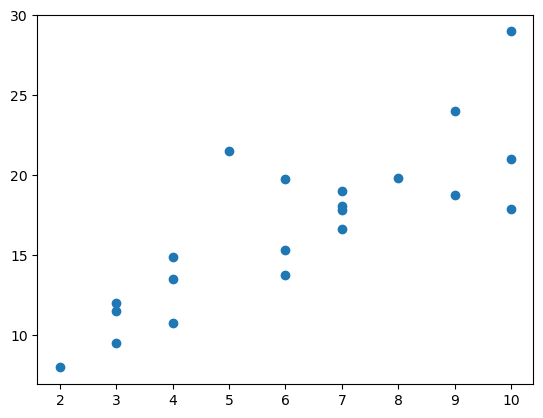

In [11]:
#plotting the graph of data to check for data discrepancies
plt.scatter(delivery['sorting_time'], delivery['delivery_time'])

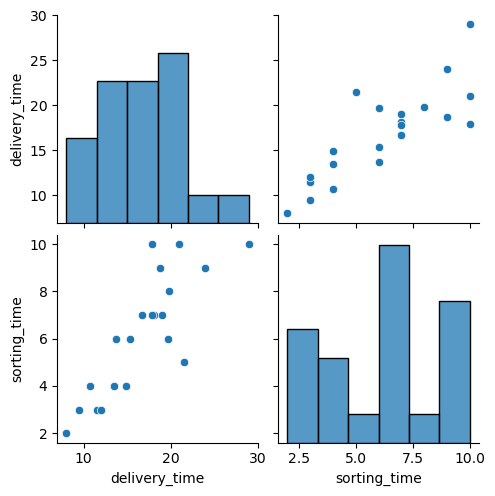

In [12]:
sns.pairplot(delivery)

/var/folders/p9/2nv9vy095r9bfc4bq1ldqx100000gn/T/ipykernel_38507/626274576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['sorting_time'])


<AxesSubplot: xlabel='sorting_time', ylabel='Density'>

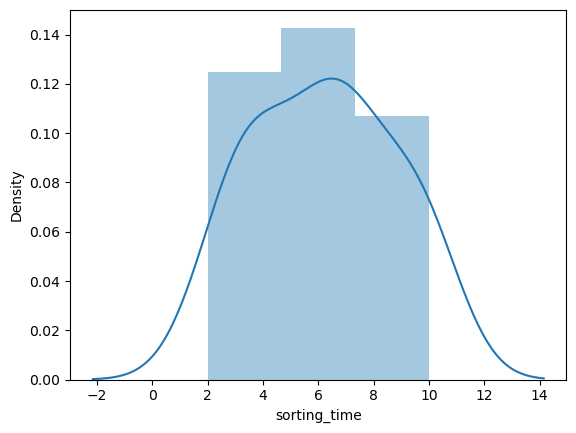

In [13]:
sns.distplot(delivery['sorting_time'])

/var/folders/p9/2nv9vy095r9bfc4bq1ldqx100000gn/T/ipykernel_38507/2826102046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['delivery_time'])


<AxesSubplot: xlabel='delivery_time', ylabel='Density'>

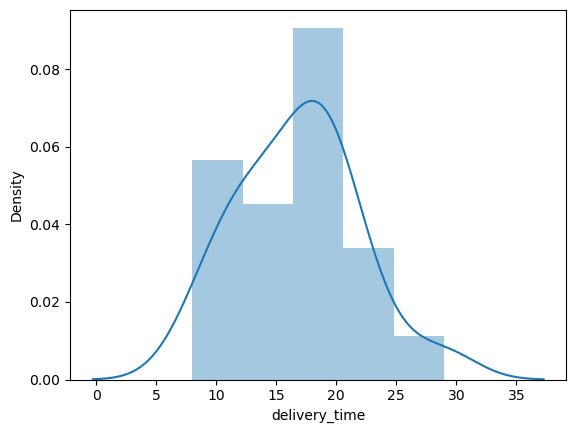

In [14]:
sns.distplot(delivery['delivery_time'])

## Regression Model Graph 


<AxesSubplot: xlabel='sorting_time', ylabel='delivery_time'>

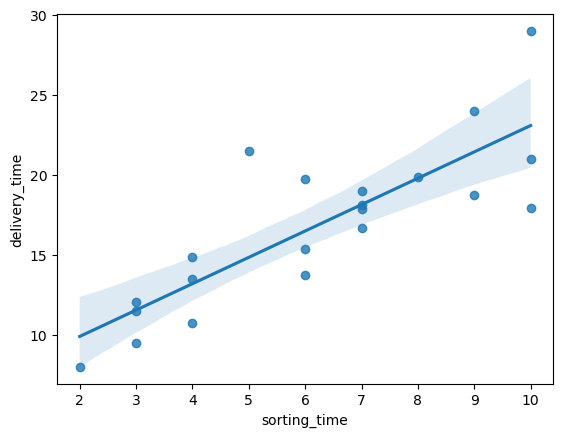

In [15]:
sns.regplot(x='sorting_time',y='delivery_time', data = delivery)

## Model Building

In [16]:
model = smf.ols('delivery_time~sorting_time', data = delivery).fit()

## Model Accuracy Testing

In [17]:
#coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
#tvalues and pvalues of the models
print('The tvalues of the model are:\n{} \n\nThe pvalues of the model are are: \n{}'.format(model.tvalues, model.pvalues))


The tvalues of the model are:
Intercept       3.823349
sorting_time    6.387447
dtype: float64 

The pvalues of the model are are: 
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
#Rsquared and Adjusted Rsquared values for the model 

print('The Rsquared value of the model is:\n{} \n\nThe Adjusted Rsquared value of the model is \n{}'.format(model.rsquared, model.rsquared_adj))



The Rsquared value of the model is:
0.6822714748417231 

The Adjusted Rsquared value of the model is 
0.6655489208860244


## Prediction of Delivery time

In [20]:
#lets create a sample dataframe of values 25,30,35,40 to see how our model predicts data
data = pd.Series([25,30,35,40])
sample = pd.DataFrame(data,columns=['sorting_time'])
sample

,sorting_time
0,25
1,30
2,35
3,40


In [21]:
#now lets predict the delivery time using our model
model.predict(sample)

0    47.808231
1    56.053331
2    64.298430
3    72.543530
dtype: float64